In [22]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [23]:
data = pd.read_csv("Mall_Customers.csv")

In [24]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [25]:
print(data.columns)

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [26]:
# Check for missing values
print(data.isnull().sum())#soo there no null values


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [27]:
print(data.duplicated().sum())


0


In [28]:
#selecting the features of the data
X = data[["Annual Income (k$)", "Spending Score (1-100)"]]


In [29]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [30]:
# Initialize the scaler
scaler = StandardScaler()

# Apply scaling
data_scaled = scaler.fit_transform(X)

In [33]:
# Find the optimal K using the Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)  # Sum of squared distances

In [37]:
#find the elbow point
from kneed import KneeLocator
knee = KneeLocator(range(1,11), wcss, curve="convex", direction="decreasing")
optimal_k = knee.knee

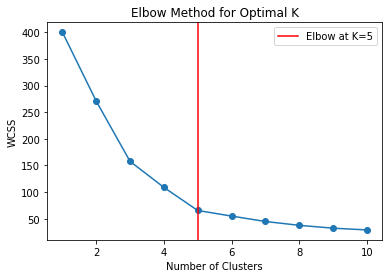

The optimal number of clusters is: 5


In [46]:
# Plot Elbow Method
plt.plot(range(1, 11), wcss, marker='o')
plt.axvline(x=optimal_k, color='red',label=f'Elbow at K={optimal_k}')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.legend()
plt.show()
# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_k}")

In [55]:
#Train K-means with the best K
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
X['Cluster']= kmeans.fit_predict(data_scaled)
print(X.head())

   Annual Income (k$)  Spending Score (1-100)  Cluster
0                  15                      39        2
1                  15                      81        3
2                  16                       6        2
3                  16                      77        3
4                  17                      40        2


C:\Users\Rishu Gupta\AppData\Local\Temp\ipykernel_28524\1948110286.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster']= kmeans.fit_predict(data_scaled)


C:\Users\Rishu Gupta\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


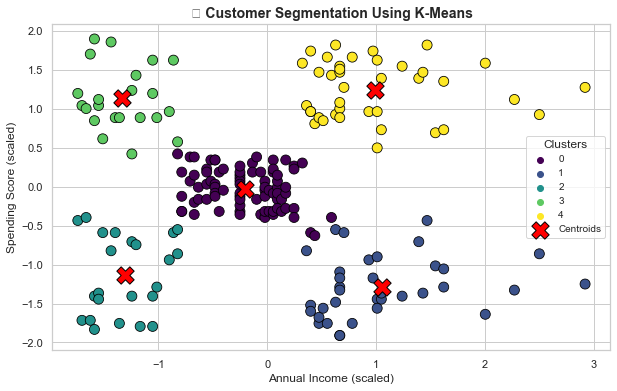

In [66]:
import seaborn as sns
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=X['Cluster'], palette='viridis', s=100, edgecolor='black')

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=300, c='red', label='Centroids', edgecolor='black')
plt.xlabel('Annual Income (scaled)', fontsize=12)
plt.ylabel('Spending Score (scaled)', fontsize=12)
plt.title(' Customer Segmentation Using K-Means', fontsize=14, fontweight='bold')
plt.legend(title="Clusters", fontsize=10)
plt.show()